In [75]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import MultipleLocator

In [76]:
data_set_path = "/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_22.7"
depth_whole = pd.read_csv(data_set_path+"/depth_estimation.csv")
depth_whole

,index,x,y,z,Unnamed: 4
0,22,3.898440,-0.798477,23.260578,NaN
1,22,2.520175,-0.448289,15.033396,NaN
2,22,3.278812,-0.598621,20.441301,NaN
3,22,3.396557,-0.657533,22.110100,NaN
4,22,5.859746,-1.079653,38.380154,NaN
...,...,...,...,...,...
12611,212,3.410918,-0.641293,20.494785,NaN
12612,212,3.432403,-0.679686,21.602959,NaN
12613,212,3.331416,-0.532410,20.945173,NaN
12614,212,3.336163,-0.523230,20.852880,NaN


In [77]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

cond = z < 60
x = x[cond]
y = y[cond]
z = z[cond]
index = index[cond]


In [78]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12,
}

In [79]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

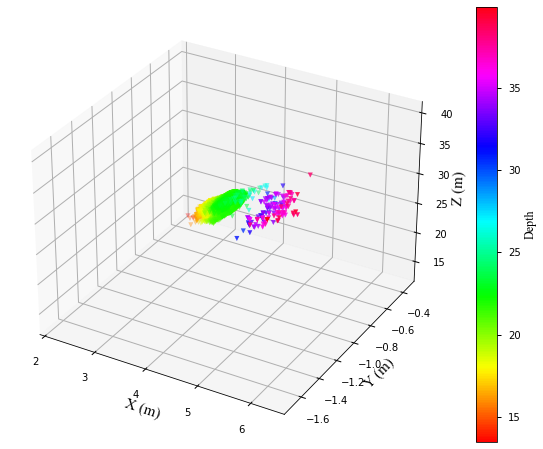

In [80]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[12,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(x, y, z, marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y (m)', font=font1)
ax.set_zlabel('Z (m)', font=font1)
cb = fig.colorbar(p2)
cb.set_label(label="Depth", font=font2)
fig.savefig(data_set_path+'/3d_points.pdf')

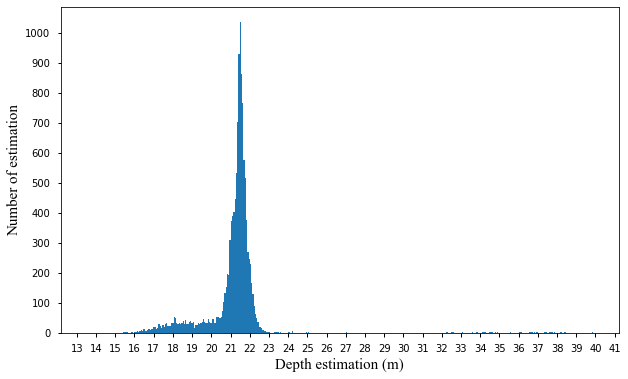

In [81]:
fig = plt.figure(figsize=[10,6])
ax = fig.gca()
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(100)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
# plt.xlim(6,33)

n, bins_limits, patches = plt.hist(z, bins=400)

plt.xlabel('Depth estimation (m)', font1)  
plt.ylabel('Number of estimation', font1)  
# plt.grid()
# plt.legend(prop=font2)
plt.show()
fig.savefig(data_set_path+'/hist_points.pdf')

In [82]:
# find the mid value
sort_z = np.sort(z)
mid = sort_z[int(sort_z.size/2)]
mid

21.433383942

In [83]:
# calculate the sigma
sigma = np.sqrt(1/z.size * np.sum((z-mid)**2))
sigma

1.8390315950274545

In [84]:
lb = mid - 3 * sigma
ub = mid + 3 * sigma
cull_cond = np.logical_and(z>lb, z<ub)
z_refine = z[cull_cond]

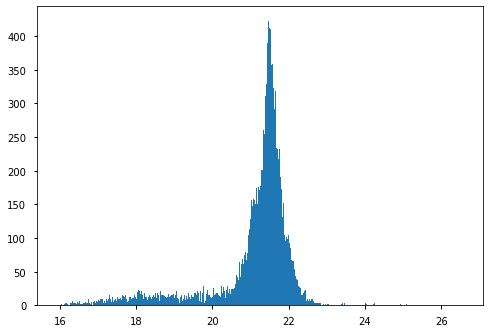

In [85]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z_refine, bins=400)

In [86]:
sort_refine_z = np.sort(z_refine)
refine_mid = sort_refine_z[int(sort_refine_z.size/2)]
refine_mid

21.428594589

In [87]:
max_index = np.argmax(n)
max_index

208

In [88]:
print(bins_limits[max_index])

21.45847259544


In [89]:
abs(bins_limits[max_index] - 22.7)/bins_limits[max_index] *100

5.7857212298690275